In [1]:
# (kx,ky)はウィンドウ座標系 (cx,cy)は複素平面上の座標
function mandelbrot(arr, width, height, xmin, ymin, xcoef, ycoef, maxIt)
    # 各ウィンドウ座標を複素座標に変換
    for ky in 1:height
        cy = ycoef*(height-ky) + ymin
        for kx in 1:width
            cx = xcoef*kx + xmin
            c = complex(cx,cy)
            z = complex(0.0, 0.0)
            flag = true

            count = 0

            # 複素平面の計算
            for i in 1:maxIt
                count = i
                z = z * z + c

                if abs(z) >= 2.0
                    flag = false
                    break
                end
            end

            # 発散したタイミングがcountに代入される
            if flag
                arr[:,ky, kx] .= ( 255.0, 255.0, 255.0 )　#色 juliaのImageライブラリはfloat型でRGBを記述
            else
                if count <= 1
                    b_color = 0 #急速な発散は黒に、濃淡
                elseif count <= 3
                    b_color = 60
                elseif count <= 5
                    b_color = 150
                else
                    b_color = 255
                end
                arr[:,ky, kx] .= ( 0, 0, b_color)

            end
        end
    end
end

mandelbrot (generic function with 1 method)

In [2]:
#全体を見るには次の2行を活かし，下の2行をコメントアウト
xmin, xmax, ymin, ymax = -3.0, 1.0, -1.5, 1.5
WIDTH  = 800 ; HEIGHT = 600 # propotional to (x,y) range



#一部を見るには次の2行を活かし，上の2行をコメントアウト
# xmin, xmax, ymin, ymax = 0.1, 0.5, 0.4, 0.8
# WIDTH  = 800 ; HEIGHT = 800 # propotional to (x,y) range

xwidth = xmax - xmin
ywidth = ymax - ymin
maxIt = 256

x_coeff = xwidth/WIDTH
y_coeff = ywidth/HEIGHT

# JuliaのRGB表示、Float型、Indexの順番に注意
array = zeros(Float64, (3,HEIGHT, WIDTH))  # 3 => RGB array
size(array)
mandelbrot( array, WIDTH, HEIGHT, xmin, ymin, x_coeff, y_coeff, maxIt )

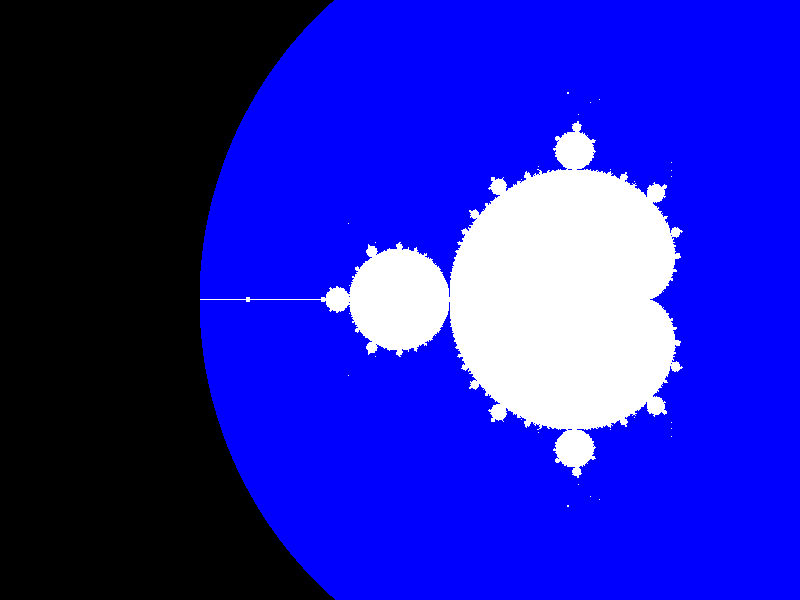

In [3]:
# Juliaのパッケージ、Images ImageViewを使う
# RGBの3次元配列はFloat型でないといけない、

using Images, ImageView
img = colorview(RGB, array)